# Learning a rotated angle and a scaling factor regarding lattice parameters from STEM-HAADF images

Author: Byung Chul Yeo

Import modules

In [1]:
import cv2
import numpy as np
import math
from PIL import Image
from skimage.feature import peak_local_max
from matplotlib import pyplot as plt
import separateBackGMM, hierCluster, markAtomColumn, learnDescriptor

Read local window image from file

In [2]:
filename = "local_images_1_1.png"

image = Image.open(filename)
size = (64,64)
image.thumbnail(size)
image = np.array(image,dtype=float)
image = np.mean(image,axis=2)

print(image.shape)

(64, 64)


Separate atom columns from background using Gaussian Mixture Model (GMM)

In [3]:
image = separateBackGMM.seperate_background(image,64)

Extract coordinates of atom columns and eliminate the artifacts in terms of multiple peaks using hierachical clustering

In [4]:
atom_columns = peak_local_max(image, min_distance=1)
atom_columns = hierCluster.hier_clustering(atom_columns)

Show the recognition of atom columns inside the image

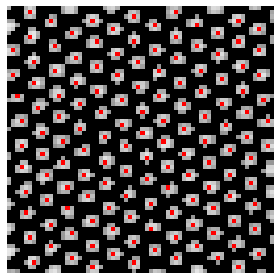

In [5]:
new_image = markAtomColumn.mark_figure(image,atom_columns)
plt.figure()
plt.imshow(new_image,cmap='gray')
plt.axis('off'), plt.xticks([]), plt.yticks([])
plt.tight_layout()

Measure rotated angle and distance of descriptor

In [6]:
angle, dist = learnDescriptor.calculate_angle_and_dist(atom_columns)
print('Rotated angle: %.2f, distance of descriptor: %.2f' %(angle,dist))

Rotated angle: 5.19, distance of descriptor: 0.56
